In [1]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
COLORS = sns.color_palette(palette='colorblind')

In [2]:
df = pd.read_csv(os.getenv("DATA_URL"))
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
153348,SGP,Asia,Singapore,2022-04-30,1193250.0,0.0,1875.143,1335.0,1.0,1.429,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
73333,GUY,South America,Guyana,2022-03-29,63239.0,4.0,5.286,1226.0,0.0,0.000,...,NaN,NaN,77.159,1.6,69.91,0.682,NaN,NaN,NaN,NaN
74477,OWID_HIC,NaN,High income,2020-11-04,19988792.0,315497.0,334739.857,500878.0,5226.0,3561.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153315,SGP,Asia,Singapore,2022-03-28,1072005.0,4848.0,7064.286,1254.0,4.0,6.571,...,5.2,28.3,NaN,2.4,83.62,0.938,NaN,NaN,NaN,NaN
108555,MRT,Africa,Mauritania,2020-04-22,7.0,0.0,0.000,1.0,0.0,0.000,...,NaN,NaN,15.950,NaN,64.92,0.546,NaN,NaN,NaN,NaN


In [3]:
df.dropna(subset=['continent'], inplace=True)
df['date'] = df['date'].apply(lambda date: datetime.datetime.strptime(date, '%Y-%m-%d'))

In [4]:
df.shape

(178468, 67)

## Overall Situation for New Cases of Covid-19
Multi-set bar plot, Group by year and month
- X: months
- Y: number of cases

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
columns_to_include = ['date', 'location', 'continent', 'total_cases', 'new_cases']
new_cases = df[columns_to_include].copy()

new_cases.set_index('date', inplace=True)
new_cases['month'] = new_cases.index.month
new_cases['year'] = new_cases.index.year

In [7]:
new_cases_per_month_n_country = new_cases.groupby(by=['year', 'month', 'location']).sum()
new_cases_per_month_n_country.head(10)

total_cases  new_cases
year month location                         
2020 1     Argentina          0.0        0.0
           Australia         38.0        9.0
           Cambodia           5.0        1.0
           Canada            30.0        4.0
           China          37897.0     9236.0
           Estonia            0.0        0.0
           Fiji               0.0        0.0
           Finland            3.0        1.0
           France            30.0        5.0
           Germany           18.0        5.0

In [8]:
# plot data for location = Italy
mask = new_cases_per_month_n_country.index.get_level_values(2) == 'Italy'
italy_new_cases = new_cases_per_month_n_country[mask]
italy_new_cases.reset_index(inplace=True)
italy_new_cases.head()

,year,month,location,total_cases,new_cases
0,2020,1,Italy,2.0,2.0
1,2020,2,Italy,3966.0,1126.0
2,2020,3,Italy,1209772.0,104664.0
3,2020,4,Italy,4928524.0,99671.0
4,2020,5,Italy,6914863.0,27534.0


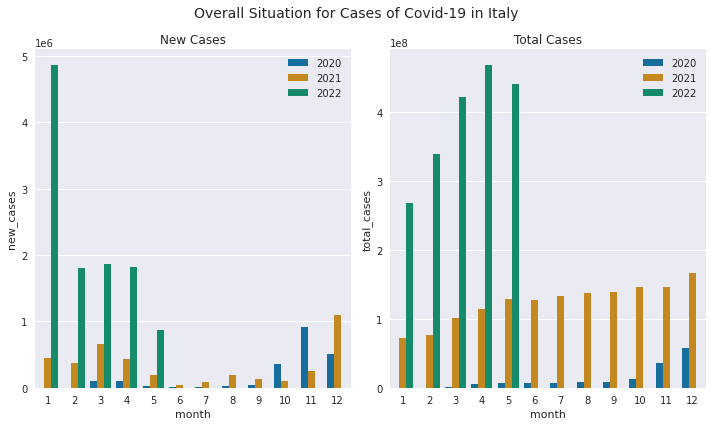

In [9]:
_ = plt.figure(figsize=[10,6])
plt.suptitle('Overall Situation for Cases of Covid-19 in Italy', fontsize=14)

plt.subplot(1,2,1)
sns.barplot(data=italy_new_cases, x='month', y='new_cases', 
            hue='year', palette=COLORS, ci=None)
plt.title('New Cases', fontsize=12)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.barplot(data=italy_new_cases, x='month', y='total_cases',
            hue='year', palette=COLORS, ci=None)
plt.title('Total Cases', fontsize=12)
plt.legend(loc='upper right')

plt.tight_layout()

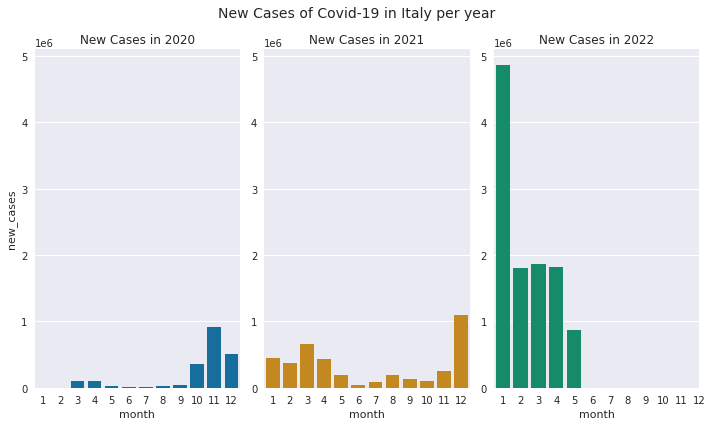

In [10]:
_ = plt.figure(figsize=[10,6])
plt.suptitle('New Cases of Covid-19 in Italy per year', fontsize=14)

ax1 = plt.subplot(1,3,1)
sns.barplot(data=italy_new_cases[italy_new_cases['year'] == 2020], 
            x='month', y='new_cases', 
            color=COLORS[0], ci=None)
plt.title('New Cases in 2020', fontsize=12)

ax2 = plt.subplot(1,3,2, sharey=ax1)
sns.barplot(data=italy_new_cases[italy_new_cases['year'] == 2021], 
            x='month', y='new_cases', 
            color=COLORS[1], ci=None)
plt.title('New Cases in 2021', fontsize=12)
ax2.set(ylabel=None)

ax3 = plt.subplot(1,3,3, sharey=ax1)
sns.barplot(data=italy_new_cases[italy_new_cases['year'] == 2022], 
            x='month', y='new_cases', 
            color=COLORS[2], ci=None)
plt.title('New Cases in 2022', fontsize=12)
plt.xticks(ticks=range(0,12), labels=range(1,13))
ax3.set(ylabel=None)

plt.tight_layout()